라이브러리 임포트

In [1]:
## library import - data preprocessing
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
## BERT embedding 
from transformers import BertTokenizer, BertModel
import torch 

In [4]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
## 평가 지표 
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
## visualization
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (윈도우용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

In [8]:
# tqdm 
from tqdm import tqdm 

In [9]:

# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

데이터 로드

In [10]:
pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [12]:
# load USvideo Dataset
df = pd.read_csv(os.path.join(path, "USvideos.csv"))

In [13]:
# data 확인
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [14]:
# 데이터 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

data prepocessing

Null/duplicate check

In [15]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [16]:
# 중복 확인 
df.duplicated().sum()

48

In [17]:
# 중복된 행 확인 
df[df.duplicated()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34899,QBL8IRJ5yHU,18.15.05,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14T19:00:01.000Z,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....
34900,t4pRQ0jn23Q,18.15.05,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14T14:00:03.000Z,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34902,MAjY8mCTXWk,18.15.05,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...",杰威爾音樂 JVR Music,10,2018-05-14T15:59:47.000Z,"周杰倫|""Jay""|""Chou""|""周董""|""周杰伦""|""周傑倫""|""杰威尔""|""周周""|""...",916128,40485,1042,4746,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒...
34903,xhs8tf1v__w,18.15.05,Terry Crews Answers the Web's Most Searched Qu...,WIRED,24,2018-05-14T16:00:29.000Z,"autocomplete|""deadpool 2""|""google autocomplete...",343967,16988,132,1308,https://i.ytimg.com/vi/xhs8tf1v__w/default.jpg,False,False,False,Terry Crews takes the WIRED Autocomplete Inter...
34904,E21NATEP9QI,18.15.05,Why Stradivarius violins are worth millions,Vox,25,2018-05-14T12:00:03.000Z,"vox.com|""vox""|""explain""|""stradivarius""|""violin...",433833,12356,307,1129,https://i.ytimg.com/vi/E21NATEP9QI/default.jpg,False,False,False,Many musicians prefer these 300-year-old instr...
34905,jzLlsbdrwQk,18.15.05,"$17 Pet vs. $100,000 Pet",BuzzFeedBlue,22,2018-05-13T15:00:57.000Z,"buzzfeed|""worth it""|""cheap vs. expensive""|""ste...",3081033,60379,6857,7796,https://i.ytimg.com/vi/jzLlsbdrwQk/default.jpg,False,False,False,“Who is Lennox and why is he so special?”Credi...
34906,1RZYOeQeIXE,18.15.05,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,2018-05-14T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...
34907,WF82ABLw8s4,18.15.05,Gabby Barrett Sings I Have Nothing by Whitney ...,American Idol,24,2018-05-14T02:23:01.000Z,"ABC|""americanidol""|""idol""|""american idol""|""rya...",735031,11734,1468,1870,https://i.ytimg.com/vi/WF82ABLw8s4/default.jpg,False,False,False,Gabby Barrett sings I Have Nothing by Whitney ...
34908,r-3iathMo7o,18.15.05,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13T19:00:25.000Z,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,8028,13293,https://i.ytimg.com/vi/r-3iathMo7o/default.jpg,False,False,False,"Fortnite, PUBG, Far Cry 5? Which game would yo..."


category mapping

In [18]:
## 카테고리 매핑 
# JSON 파일 경로
json_path = os.path.join(path, "US_category_id.json")

# JSON 로드
with open(json_path, 'r', encoding='utf-8') as f:
    category_json = json.load(f)

# 카테고리 매핑 딕셔너리 생성
category_mapping = {
    int(item['id']): item['snippet']['title']
    for item in category_json['items']
}

In [19]:
# 매핑 딕셔너리 확인
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [20]:
df['category_name'] = df['category_id'].map(category_mapping)

In [21]:
df['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object

target log-scaling

In [22]:
# log-scaling 진행
df['log_views'] = np.log1p(df['views'])

Modeling #1. category_id를 feature로 포함

In [23]:
# category를 포함한 열 불러오기 
category_df = df[['title', 'log_views', 'category_id']]
category_df

,title,log_views,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,13.525659,22
1,The Trump Presidency: Last Week Tonight with J...,14.698775,24
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",14.975981,23
3,Nickelback Lyrics: Real or Fake?,12.745978,24
4,I Dare You: GOING BALD!?,14.555413,24
...,...,...,...
40944,The Cat Who Caught the Laser,14.337638,15
40945,True Facts : Ant Mutualism,13.878297,22
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,13.879848,24
40947,How Black Panther Should Have Ended,15.549078,1


In [24]:
# BERT load 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [25]:
# BERT embedding extract 

## CLS 벡터 추출 함수 정의 

def extract_cls_embedding(text):
    encoding = tokenizer(text,
                         max_length=32,
                         truncation=True,
                         padding='max_length',
                         return_tensors='pt')
    input_ids_tensor = encoding['input_ids'].to(device)
    attention_mask_tensor = encoding['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids_tensor, attention_mask=attention_mask_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

In [26]:
import numpy as np
embeddings = np.load("title_cls_embeddings.npy")

Modeling#2 category별 Model 구축

In [27]:
# category별 데이터 수 확인 
category_counts = df['category_name'].value_counts().sort_values(ascending=True)

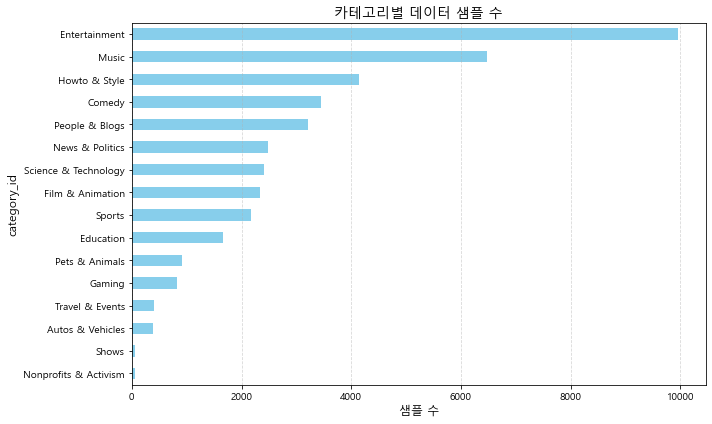

In [28]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')

plt.title("카테고리별 데이터 샘플 수", fontsize=14)
plt.xlabel("샘플 수", fontsize=12)
plt.ylabel("category_id", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
# BERT embedding에 category 결합
category_df['title_embedding'] = list(embeddings)

C:\Users\user\AppData\Local\Temp\ipykernel_19608\3614589385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['title_embedding'] = list(embeddings)


Howto&style

In [30]:
# category filtering
cat_name = "Howto & Style"
group = category_df[category_df['category_id'] == 26]

X = np.vstack(group['title_embedding'].values)
y = group['log_views']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Howto & Style - Lasso

In [31]:
# Lasso 모델 정의
alpha_value = 0.0001
lasso = Lasso(alpha=alpha_value)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Lasso")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장 
lasso_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Lasso",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: Lasso
Alpha: 0.0001
RMSE: 0.5579
R²: 0.829
Spearman: 0.9421


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+02, tolerance: 5.771e-01
  model = cd_fast.enet_coordinate_descent(


Howto & Style - Linear Regression

In [32]:
# LinearRegression 모델 정의 및 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: LinearRegression")
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
linear_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "LinearRegression",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: LinearRegression
RMSE: 0.577
R²: 0.8171
Spearman: 0.9453


Howto & Style - Ridge

In [33]:
# Ridge 모델 정의 및 학습
alpha_value = 1.0
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: Ridge")
print("Alpha:", alpha_value)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
ridge_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Ridge",
    "Alpha": alpha_value,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: Ridge
Alpha: 1.0
RMSE: 0.5708
R²: 0.821
Spearman: 0.9352


Howto & Style - RF

In [34]:
# RF 모델 정의 및 학습
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: RandomForest")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
rf_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "RandomForest",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: RandomForest
n_estimators: 100
RMSE: 0.4219
R²: 0.9022
Spearman: 0.9645


Howto & Style - Gradient

In [35]:
# Gradient Boosting 모델 정의 및 학습
n_estimators = 100
gbr = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: GradientBoosting")
print("n_estimators:", n_estimators)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
gbr_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "GradientBoosting",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: GradientBoosting
n_estimators: 100
RMSE: 0.6114
R²: 0.7947
Spearman: 0.9194


In [36]:
# 모델별 결과 DataFrame 합치기
all_results = pd.concat([
    lasso_results_df,
    linear_results_df,
    ridge_results_df,
    rf_results_df,
    gbr_results_df
], ignore_index=True)

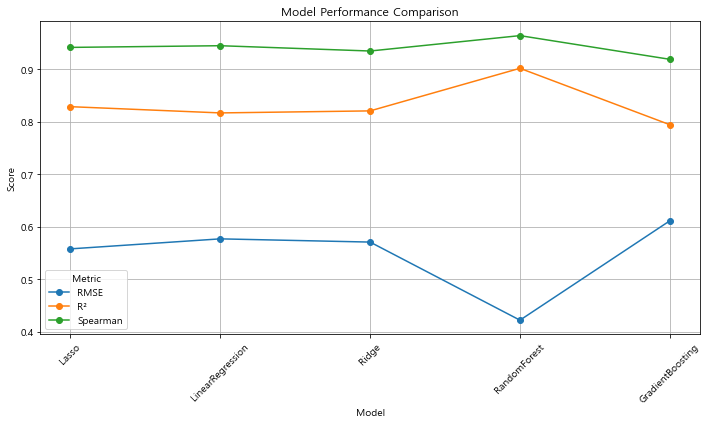

In [37]:
# 시각화를 위한 변환 (wide → long)
results_long = all_results.melt(
    id_vars="Model", 
    value_vars=["RMSE", "R²", "Spearman"],
    var_name="Metric", 
    value_name="Score"
)

# 선 그래프(line chart)로 시각화
plt.figure(figsize=(10, 6))
for metric in results_long["Metric"].unique():
    subset = results_long[results_long["Metric"] == metric]
    plt.plot(subset["Model"], subset["Score"], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()

Howto &Style 파라미터튜닝(베이지안 최적화 사용)

In [38]:
!pip install BayesianOptimization

Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable


Howto & Style - Lasso(베이지안 최적화)

In [40]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

def objective_lasso(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
    model = Lasso(alpha=alpha)
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return -score.mean()

study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(objective_lasso, n_trials=50)

# 튜닝된 모델로 최종 학습 및 평가
best_alpha = study_lasso.best_params['alpha']
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)
y_pred = lasso_best.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

# 출력
print("Category:", cat_name)
print("Model: Lasso (Bayesian)")
print("Best Alpha:", best_alpha)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
lasso_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Lasso (Bayesian)",
    "Alpha": best_alpha,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])


[I 2025-06-08 20:01:59,316] A new study created in memory with name: no-name-37c64c1d-bb06-437f-bf75-f33e516c44ed
C:\Users\user\AppData\Local\Temp\ipykernel_19608\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+02, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.323e+01, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.207e+01, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.912e+01, tolerance: 4.622e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.664e+01, tolerance: 4.575e-01
  model = cd_fast.enet_coordinate_descent(
[I 2025-06-08 20:02:18,273] Trial 12 finished with value: 0.26086954483861097 and parameters: {'alpha': 1.0990609984975743e-05}. Best is trial 3 with value: 0.23973641023224576.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\2454646385.py:6: FutureWarning: sug

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.235e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.596e+01, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.156e+01, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.433e+01, tolerance: 4.622e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Local\Temp\ipykernel_19608\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.311e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.207e+01, t

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+02, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+02, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.289e+01, tolerance: 4.575e-01
  model = cd_fast.enet_coordinate_descent(
[I 2025-06-08 20:03:10,844] Trial 32 finished with value: 0.2565429472964334 and parameters: {'alpha': 2.0157469986455966e-05}. Best is trial 31 with value: 0.23497872639591896.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+02, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+02, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.480e+01, tolerance: 4.666e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.400e+01, tolerance: 4.621e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

C:\Users\user\AppData\Local\Temp\ipykernel_19608\2454646385.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.298e+01, tolerance: 4.600e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.663e+01, t

Category: Howto & Style
Model: Lasso (Bayesian)
Best Alpha: 6.693664848964216e-05
RMSE: 0.5544
R²: 0.8311
Spearman: 0.9432


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+02, tolerance: 5.771e-01
  model = cd_fast.enet_coordinate_descent(


Howto & Style - Linear Regression

In [41]:
# LinearRegression 모델 정의 및 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

# 성능 지표 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan


# 출력
print("Category:", cat_name)
print("Model: LinearRegression")
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", "NaN" if np.isnan(spearman_corr) else round(spearman_corr, 4))

# 결과 저장
linear_results_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "LinearRegression",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

Category: Howto & Style
Model: LinearRegression
RMSE: 0.577
R²: 0.8171
Spearman: 0.9453


Howto & Style - Ridge(베이지안 최적화)

In [42]:
def objective_ridge(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
    model = Ridge(alpha=alpha)
    score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return -score.mean()

study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(objective_ridge, n_trials=50)

# 최적 모델 적용
best_alpha = study_ridge.best_params['alpha']
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)
y_pred = ridge_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

print("Category:", cat_name)
print("Model: Ridge (Bayesian)")
print("Alpha:", best_alpha)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", round(spearman_corr, 4) if not np.isnan(spearman_corr) else "NaN")

ridge_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "Ridge (Bayesian)",
    "Alpha": best_alpha,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])


[I 2025-06-08 20:03:51,747] A new study created in memory with name: no-name-8b93a4c3-69f8-41b9-83ef-57684fc2e6a5
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.06278e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.02124e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklea

[I 2025-06-08 20:03:52,730] Trial 6 finished with value: 0.2487339199017784 and parameters: {'alpha': 0.008496053787547518}. Best is trial 4 with value: 0.24624359365533915.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 20:03:54,095] Trial 7 finished with value: 0.2507792349659344 and parameters: {'alpha': 1.919102223910774e-05}. Best is trial 4 with value: 0.24624359365533915.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C

C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 20:03:55,792] Trial 17 finished with value: 0.24204906635390394 and parameters: {'alpha': 0.05798798018345078}. Best is trial 14 with value: 0.24002052576812102.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 20:03:55,943] Trial 18 finished with value: 0.31142125193228354 and parameters: {'alpha': 1.8791282342837978}. Best is trial 14 with value: 0.24002052576812102.

[I 2025-06-08 20:03:58,602] Trial 28 finished with value: 0.23985003472623445 and parameters: {'alpha': 0.11629256605310229}. Best is trial 28 with value: 0.23985003472623445.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.05377e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.04137e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\

[I 2025-06-08 20:03:59,923] Trial 37 finished with value: 0.2837426551745688 and parameters: {'alpha': 1.143944713815317}. Best is trial 31 with value: 0.23980437544566685.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.23354e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.27375e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Use

C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 20:19:34,355] Trial 47 finished with value: 0.23979112888500204 and parameters: {'alpha': 0.13188728391923418}. Best is trial 41 with value: 0.2397901693948797.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\3443496583.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 10)
[I 2025-06-08 20:19:34,589] Trial 48 finished with value: 0.31795504493885185 and parameters: {'alpha': 2.0738418773288694}. Best is trial 41 with value: 0.2397901693948797.
C

Category: Howto & Style
Model: Ridge (Bayesian)
Alpha: 0.1266301165417827
RMSE: 0.5523
R²: 0.8324
Spearman: 0.9461


Howto & Style - RF(베이지안 최적화)

In [43]:
def objective_rf(trial):
    model = RandomForestRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        max_depth=trial.suggest_int("max_depth", 5, 50),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),  # ✅ 'auto' 제거
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(
        model, X_train, y_train,
        scoring='neg_mean_squared_error',
        cv=3,
        error_score=np.nan  # ✅ 에러 방지
    )
    return -np.nanmean(score)  # 모든 score가 nan인 경우 대비


study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

best_params_rf = study_rf.best_params
rf_best = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

print("Category:", cat_name)
print("Model: RandomForest (Bayesian)")
print("Params:", best_params_rf)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", round(spearman_corr, 4) if not np.isnan(spearman_corr) else "NaN")

rf_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "RandomForest (Bayesian)",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])


[I 2025-06-08 20:19:34,882] A new study created in memory with name: no-name-55944184-37c1-49e4-a30a-45e28b50ff3d


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-08 20:19:47,097] Trial 0 finished with value: 0.7672698403673034 and parameters: {'n_estimators': 497, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7672698403673034.
[I 2025-06-08 20:19:51,500] Trial 1 finished with value: 0.31969032058201496 and parameters: {'n_estimators': 453, 'max_depth': 37, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.31969032058201496.
[I 2025-06-08 20:19:54,028] Trial 2 finished with value: 0.30539807405096514 and parameters: {'n_estimators': 258, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 2 with value: 0.30539807405096514.
[I 2025-06-08 20:20:03,145] Trial 3 finished with value: 0.21523623353217883 and parameters: {'n_estimators': 341, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.2152362335

[I 2025-06-08 20:22:36,826] Trial 33 finished with value: 0.20910424182777312 and parameters: {'n_estimators': 271, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 11 with value: 0.20326308132883686.
[I 2025-06-08 20:22:41,159] Trial 34 finished with value: 0.2057897376604756 and parameters: {'n_estimators': 235, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 11 with value: 0.20326308132883686.
[I 2025-06-08 20:22:44,058] Trial 35 finished with value: 0.26780011320439173 and parameters: {'n_estimators': 237, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 11 with value: 0.20326308132883686.
[I 2025-06-08 20:22:47,677] Trial 36 finished with value: 0.20529367835673087 and parameters: {'n_estimators': 191, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 11 with value: 0.

Howto & Style - Gradient(베이지안 최적화)

In [44]:
def objective_gbr(trial):
    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        max_depth=trial.suggest_int("max_depth", 3, 10),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        random_state=42
    )
    score = cross_val_score(
        model, X_train, y_train,
        scoring='neg_mean_squared_error',
        cv=3,
        error_score=np.nan  # ✅ 이거 하나가 핵심!
    )
    return -np.nanmean(score)  # 모든 trial 실패 시에도 안전하게 작동


study_gbr = optuna.create_study(direction='minimize')

from tqdm.notebook import tqdm
for _ in tqdm(range(50), desc="Gradient Boosting 튜닝 중"):
    study_gbr.optimize(objective_gbr, n_trials=1)

best_params_gbr = study_gbr.best_params
gbr_best = GradientBoostingRegressor(**best_params_gbr, random_state=42)
gbr_best.fit(X_train, y_train)
y_pred = gbr_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
spearman_corr = spearmanr(y_test, y_pred).correlation if np.std(y_pred) > 0 else np.nan

print("Category:", cat_name)
print("Model: GradientBoosting (Bayesian)")
print("Params:", best_params_gbr)
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))
print("Spearman:", round(spearman_corr, 4) if not np.isnan(spearman_corr) else "NaN")

gbr_optuna_df = pd.DataFrame([{
    "Category": cat_name,
    "Model": "GradientBoosting (Bayesian)",
    "Alpha": None,
    "RMSE": rmse,
    "R²": r2,
    "Spearman": spearman_corr
}])

[I 2025-06-08 20:23:50,317] A new study created in memory with name: no-name-c6ee2424-a081-4676-aac9-a5b6fdff1542


Gradient Boosting 튜닝 중:   0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-06-08 20:28:33,116] Trial 0 finished with value: 0.19334420047601616 and parameters: {'n_estimators': 305, 'learning_rate': 0.046397052138780585, 'max_depth': 4, 'min_samples_split': 9, 'subsample': 0.6372973254860087}. Best is trial 0 with value: 0.19334420047601616.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-06-08 20:46:34,210] Trial 1 finishe

[I 2025-06-08 23:47:01,833] Trial 13 finished with value: 0.1632464689026011 and parameters: {'n_estimators': 447, 'learning_rate': 0.07476411542392467, 'max_depth': 10, 'min_samples_split': 4, 'subsample': 0.9312944186561968}. Best is trial 13 with value: 0.1632464689026011.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-06-09 00:01:00,830] Trial 14 finished with value: 0.161991347719279 and parameters: {'n_estimators': 423, 'learning_rate': 0.012121612447705623, 'max_depth': 8, 'min_samples_split': 5, 'subsample': 0.9964678981264736}. Best is trial 14 with value: 0.161991347719279.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been 

C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-06-09 02:20:29,972] Trial 27 finished with value: 0.16395040027793398 and parameters: {'n_estimators': 469, 'learning_rate': 0.033586456233015115, 'max_depth': 6, 'min_samples_split': 6, 'subsample': 0.8227103064482854}. Best is trial 21 with value: 0.16040243607962326.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-06-09 02:26:50,654] Trial 28 fini

[I 2025-06-09 05:09:19,657] Trial 40 finished with value: 0.211386749317531 and parameters: {'n_estimators': 396, 'learning_rate': 0.010343047942793906, 'max_depth': 6, 'min_samples_split': 7, 'subsample': 0.847004066650115}. Best is trial 38 with value: 0.15932820914066334.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-06-09 05:23:34,540] Trial 41 finished with value: 0.1618427204751842 and parameters: {'n_estimators': 423, 'learning_rate': 0.03795524456885571, 'max_depth': 8, 'min_samples_split': 5, 'subsample': 0.8680730240237597}. Best is trial 38 with value: 0.15932820914066334.
C:\Users\user\AppData\Local\Temp\ipykernel_19608\459554988.py:4: FutureWarning: suggest_loguniform has been

Category: Howto & Style
Model: GradientBoosting (Bayesian)
Params: {'n_estimators': 428, 'learning_rate': 0.049434403101785845, 'max_depth': 7, 'min_samples_split': 6, 'subsample': 0.8635162882012001}
RMSE: 0.3858
R²: 0.9182
Spearman: 0.9681


In [45]:
# 모델별 결과 DataFrame 합치기
all_results = pd.concat([
    lasso_optuna_df,
    linear_results_df,
    ridge_optuna_df,
    rf_optuna_df,
    gbr_optuna_df
], ignore_index=True)

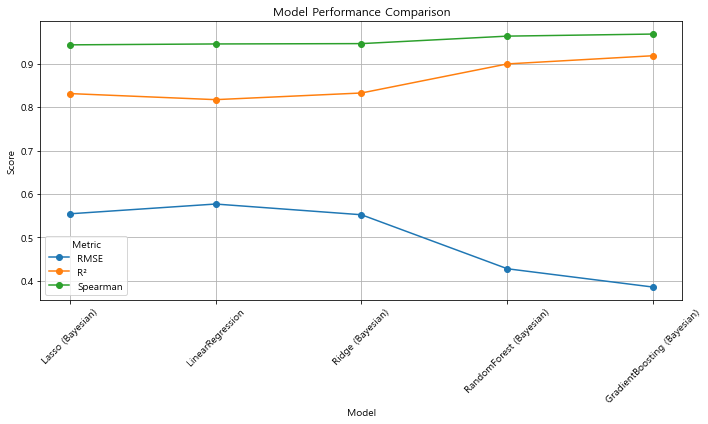

In [46]:
#시각화를 위한 변환 (wide → long)
results_long = all_results.melt(
    id_vars="Model", 
    value_vars=["RMSE", "R²", "Spearman"],
    var_name="Metric", 
    value_name="Score"
)

# 선 그래프(line chart)로 시각화
plt.figure(figsize=(10, 6))
for metric in results_long["Metric"].unique():
    subset = results_long[results_long["Metric"] == metric]
    plt.plot(subset["Model"], subset["Score"], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.grid(True)
plt.tight_layout()
plt.show()